In [4]:
import numpy as np 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt 


In [5]:
mnist=fetch_openml('mnist_784',as_frame=False)

In [6]:
print(mnist.data.shape)

(70000, 784)


In [7]:
X_train,X_test,y_train,y_test=train_test_split(mnist.data,mnist.target,test_size=10000,random_state=42,stratify=mnist.target)

In [8]:
pca=PCA()


In [9]:
pca.fit(X_train )

PCA()

In [10]:
print(pca.explained_variance_ratio_)

[9.74222318e-02 7.14677581e-02 6.14234823e-02 5.40751057e-02
 4.88034355e-02 4.30026072e-02 3.28317659e-02 2.89375180e-02
 2.75028330e-02 2.34756365e-02 2.10118359e-02 2.04059619e-02
 1.71069697e-02 1.69855646e-02 1.58290923e-02 1.48927416e-02
 1.31999196e-02 1.27840134e-02 1.18555064e-02 1.15086739e-02
 1.06979179e-02 1.01031665e-02 9.56152119e-03 9.11559238e-03
 8.86326027e-03 8.38966309e-03 8.12656059e-03 7.84228505e-03
 7.38842442e-03 6.90634200e-03 6.57809294e-03 6.46303977e-03
 6.01902499e-03 5.86191783e-03 5.67735735e-03 5.44235061e-03
 5.04267769e-03 4.87702877e-03 4.80242705e-03 4.68276619e-03
 4.55131383e-03 4.45015029e-03 4.17827326e-03 3.96606333e-03
 3.84470320e-03 3.76099038e-03 3.62911037e-03 3.49264400e-03
 3.38201146e-03 3.19934515e-03 3.16164250e-03 3.11041698e-03
 2.97465386e-03 2.86831004e-03 2.82492900e-03 2.69705921e-03
 2.68429989e-03 2.56591759e-03 2.54888380e-03 2.45179366e-03
 2.39383588e-03 2.38394851e-03 2.29592170e-03 2.20291056e-03
 2.14108162e-03 2.058154

In [11]:
cumsum=np.cumsum(pca.explained_variance_ratio_)

In [13]:
d=np.argmax(cumsum >=0.95)+1

In [14]:
print("minimum number of dimentions required to preserve 95% variance:", d)

minimum number of dimentions required to preserve 95% variance: 154


In [15]:
pca=PCA(n_components=0.95)

In [16]:
X_train_reduced=pca.fit_transform(X_train)

In [17]:
print("number of principal components:",pca.n_components_)

number of principal components: 154


In [19]:
print("Explained variance ratio by {0} components: {1: .4}".format(
    pca.n_components_, pca.explained_variance_ratio_.sum()))

Explained variance ratio by 154 components:  0.9504


[]

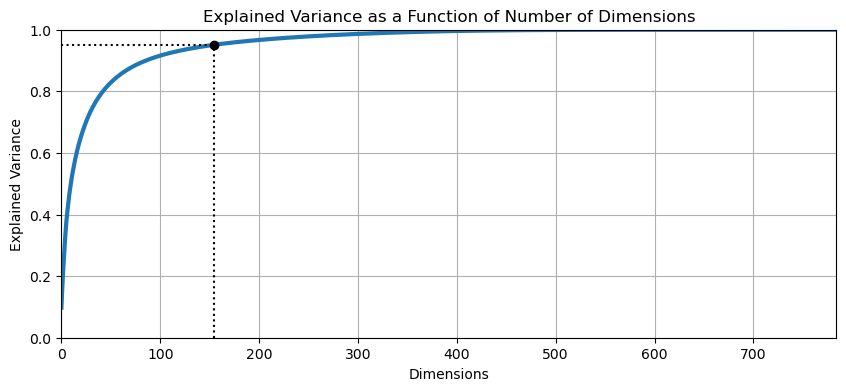

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(cumsum, linewidth = 3)
plt.axis([0, mnist.data.shape[1], 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.title("Explained Variance as a Function of Number of Dimensions")
plt.plot()


In [21]:
rf_clf = make_pipeline(
    PCA(random_state=42),                 
    RandomForestClassifier(random_state=42)) 

In [22]:
hp = {
    "pca__n_components": np.arange(20, 160),
    "randomforestclassifier__n_estimators": np.arange(100, 500)
}

In [23]:
rnd_search =RandomizedSearchCV(
    rf_clf,
    hp,
    n_iter=20,
    n_jobs=-1,
    cv=3,
    random_state=42
)

In [24]:
rnd_search.fit(X_train[:10000], y_train[:10000]) 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'pca__n_components': array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64...
       412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424,
       425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437,
       438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450,
       451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463,
       464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476,
       477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489,
       490, 491, 492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [26]:
print(rnd_search.best_params_)
{'randomforestclassifier__n_estimators': 365, 'pca__n_components': 35}

{'randomforestclassifier__n_estimators': 365, 'pca__n_components': 35}


{'randomforestclassifier__n_estimators': 365, 'pca__n_components': 35}

In [27]:
print("Best Random Forest Model Score:", rnd_search.best_score_)

Best Random Forest Model Score: 0.92839955861213
